##### This analysis is done in python primarily using the pandas library, and jupyter notebook as an interactive interpreter.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
pd.options.display.max_rows = 30

df = pd.read_csv("/Users/Hegstrom/Desktop/HCT390_assignment_ACO_data_file.csv", thousands=',')
# Getting everything loaded up, and setting up the dataframe.

# Here, I'm making the savings rate into a percentage. This isn't necessary, I just like the formatting.
df['Sav_rate'] = df['Sav_rate']*100 

# Question #3

## Are there geographic variations in ACO performance, with respect to ACO savings? Which regions of the country perform better?

In [9]:
# Regions are already classified in the dataset for us, thankfully.
region_savings_pivot = df.groupby('Region').agg({'Sav_rate': [np.min, np.mean, np.max, np.median, len]})
region_savings_pivot.columns = ['Min', 'Mean', 'Max', 'Median', 'Count']
region_savings_pivot.T

Region,Midwest,Northeast,South,West
Min,0.003080,0.081187,0.009720,0.007320
Mean,3.252223,3.706176,3.407849,3.031690
Max,15.077416,31.094562,14.159549,12.229850
Median,2.493829,2.557839,2.576123,2.267816
Count,129.000000,102.000000,252.000000,65.000000


Just based on this quick pivot, there is a possibility there are some differences based on region. The Northest has a higher mean compared to the west.

Let's investigate by creating a graph.

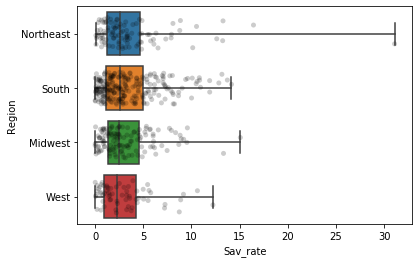

In [10]:
ax = sns.boxplot(x=df['Sav_rate'], y=df['Region'], whis=np.inf)
ax = sns.stripplot(x=df['Sav_rate'], y=df['Region'], color="0", jitter=.3, alpha=0.2)

Well, this makes the difference appear a bit less significant. The one institution with a tremendous savings rate is in the northeast. Let's drop them to look further.

In [11]:
# Again, keeping everyone with a savings rate less than 30.
region_df = df[df['Sav_rate'] < 30]

region_savings_pivot = region_df.groupby('Region').agg({'Sav_rate': [np.min, np.mean, np.max, np.median, len]})
region_savings_pivot.columns = ['Min', 'Mean', 'Max', 'Median', 'Count']
region_savings_pivot.T

Region,Midwest,Northeast,South,West
Min,0.003080,0.081187,0.009720,0.007320
Mean,3.252223,3.435004,3.407849,3.031690
Max,15.077416,16.443580,14.159549,12.229850
Median,2.493829,2.510001,2.576123,2.267816
Count,129.000000,101.000000,252.000000,65.000000


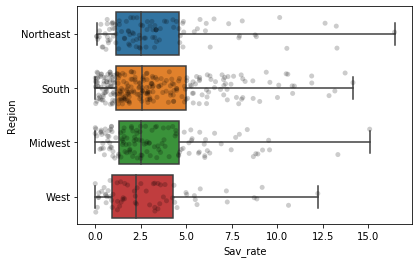

In [12]:
ax = sns.boxplot(x=region_df['Sav_rate'], y=region_df['Region'], whis=np.inf)
ax = sns.stripplot(x=region_df['Sav_rate'], y=region_df['Region'], color="0", jitter=.3, alpha=0.2)

With the outlier in the northeast removed, the differences among the regions doesn't appear as big.

So, to answer #3, there does not appear to be any significant difference between the regions. The West is slightly lower, but this will not reach statistical significance given the variation. Let's test to be sure by performing a one-way ANOVA.

In [16]:
import scipy.stats as stats

northeast_array = region_df[region_df['Region'] == "Northeast"]['Sav_rate'].values
south_array = region_df[region_df['Region'] == "South"]['Sav_rate'].values
midwest_array = region_df[region_df['Region'] == "Midwest"]['Sav_rate'].values
west_array = region_df[region_df['Region'] == "West"]['Sav_rate'].values

fvalue, pvalue = stats.f_oneway(northeast_array, south_array, midwest_array, west_array)
print('f-value: {}, p-value: {}'.format(fvalue, pvalue))

f-value: 0.35499300603006845, p-value: 0.7855498202738662


The p-value is not significant.